<a href="https://colab.research.google.com/github/PatrickJahn/easv-ML-mini-project/blob/main/ML_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Mini Project

# Spam Email Classification - Random Forest


## Loading and preparation of data

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = [f'feature_{i}' for i in range(57)] + ['is_spam']
df = pd.read_csv(url, names=column_names)

# Preprocess the data
# Split the data into features and target
X = df.drop('is_spam', axis=1)
y = df['is_spam']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training and fine-tuning of a model

In [2]:
# Import the Random Forest Model and model selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)


# Define a grid of hyperparameters to test
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model for predictions
best_grid = grid_search.best_estimator_
predictions = best_grid.predict(X_test)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; tot

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
488 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.9/site-packages/s

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


## Evaluation of the model

In [3]:
# Import necessary modules for evaluation
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
predictions = random_forest.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

# Evaluate the best model with fine tuning
print("Accuracy after fine-tuning:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9565532223026793
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       804
           1       0.97      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381

Accuracy after fine-tuning: 0.9565532223026793
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       804
           1       0.97      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381



# Income Level Prediction - MLPP


## Import

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

## Loading and preparation of Data


In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]

# Load the data
data = pd.read_csv(url, names=column_names, na_values=' ?', sep=',\s', engine='python')

# Split the data into features and target label
X = data.drop('income', axis=1)
y = data['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Convert income to binary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define categorical and numerical features for preprocessing
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Create preprocessors for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Training and fine-tuning of a model

In [6]:
# Create an MLP model pipeline
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42))
])

X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42, stratify=y_train)

param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,)],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__alpha': [0.0001, 0.001]
}

grid_search = GridSearchCV(mlp_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# Fine-tuning the MLP model
grid_search.fit(X_train_small, y_train_small)

# Print out the best parameters
print("Best parameters found: ", grid_search.best_params_)

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

Best parameters found:  {'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (100,), 'mlpclassifier__solver': 'adam'}


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Evaluation of the model

In [7]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8242399426758112
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7417
           1       0.64      0.62      0.63      2352

    accuracy                           0.82      9769
   macro avg       0.76      0.75      0.76      9769
weighted avg       0.82      0.82      0.82      9769



# Age Classification from images - CNN

## Loading and preparation of data

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


In [9]:
# Setup the path to the images and the attributes
PATH_TO_ATTR = 'Datasets/other/faces/train.csv'
PATH_TO_IMGS = 'Datasets/other/faces/Train'


# Then we check if there are the same amount of attributes and images
data = pd.read_csv(PATH_TO_ATTR)
images = os.listdir(PATH_TO_IMGS)

print(data.shape[0])
print(len(images))

19906
19906


In [10]:
# Read the csv file to check out the attributes
data.describe()

,ID,Class
count,19906,19906
unique,19906,3
top,377.jpg,MIDDLE
freq,1,10804


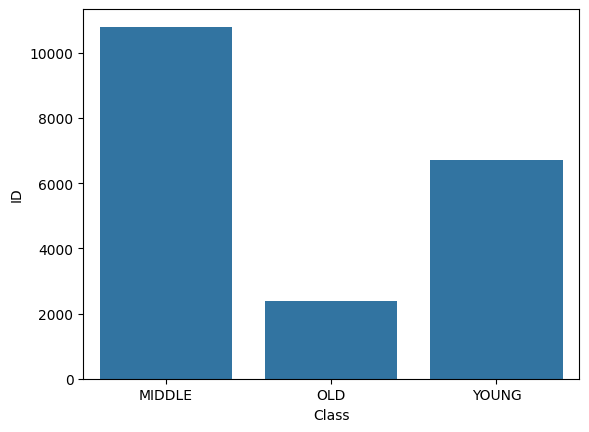

In [11]:
# Check how many of each attribute class their is
groupedvalues = data.groupby('Class').count()
g = sns.barplot(x='Class', y='ID', data=groupedvalues)

In [12]:
# Replace the 3 Class values with a numeric value
data['Class'].replace(['YOUNG','MIDDLE','OLD'],[0,1,2],inplace=True)

# We want to make sure that the order of image classes is random
data.sample(frac=1)

data.head()

/var/folders/96/h_yr16s542x1fmd1pbxnrzp00000gn/T/ipykernel_10328/3242955462.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Class'].replace(['YOUNG','MIDDLE','OLD'],[0,1,2],inplace=True)
/var/folders/96/h_yr16s542x1fmd1pbxnrzp00000gn/T/ipykernel_10328/3242955462.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

,ID,Class
0,377.jpg,1
1,17814.jpg,0
2,21283.jpg,1
3,16496.jpg,0
4,4487.jpg,1


In [13]:
# Function to read the image an reformat it so all images are the same size and type
def readAndFormatImage(path):
      img = tf.io.read_file(path)
      img = tf.image.decode_jpeg(img, channels=3)
      img = tf.image.convert_image_dtype(img, dtype=tf.float32)
      img = tf.image.resize(img, (150, 150))
      return img

In [14]:
def load_data(image_path, label):
    img = readAndFormatImage(image_path)
    return (img, label)

In [15]:
# built the list of image paths and list of respective responses of the images
image_paths = []
for path in os.listdir(PATH_TO_IMGS):
    image_paths.append(PATH_TO_IMGS+"/"+path)
print(len(image_paths))

response_list = []

for i in image_paths:
    _,tail = os.path.split(i)
    data.loc
    response = data.loc[data['ID'] == tail]['Class'].values[0]
    response_list.append(response)
print(len(response_list))

19906
19906


In [16]:
# split the dataset into train and test dataset
train_size = int(0.9*(len(image_paths)))
print(train_size)
test_size = int(0.1*(len(image_paths)))

train_set = tf.data.Dataset.from_tensor_slices((image_paths[:train_size], response_list[:train_size]))
test_set = tf.data.Dataset.from_tensor_slices((image_paths[test_size:], response_list[test_size:]))

17915


In [17]:
train_set = (train_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

test_set = (test_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

## Training and fine-tuning of a model

In [30]:
# build the layers of CNN model
from tensorflow.keras import layers,models

cnn_model = models.Sequential([
    layers.Conv2D(filters=30, kernel_size=(3), activation='relu', input_shape=(150, 150, 3), padding = 'same'),
    layers.MaxPooling2D((2)),


    layers.Conv2D(filters=64, kernel_size=(3), activation='relu', padding = 'same'),
    layers.MaxPooling2D((2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [19]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 30)   │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,607,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,625,867 (21.46 MB)

 Trainable params: 5,625,867 (21.46 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# train the model
cnn_model.fit(train_set, epochs=10, validation_data=test_set)

Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 119s 423ms/step - accuracy: 0.5736 - loss: 1.0206 - val_accuracy: 0.6475 - val_loss: 0.7748
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 112s 400ms/step - accuracy: 0.6605 - loss: 0.7508 - val_accuracy: 0.6629 - val_loss: 0.7457
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 112s 399ms/step - accuracy: 0.6904 - loss: 0.6990 - val_accuracy: 0.6944 - val_loss: 0.6809
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 110s 390ms/step - accuracy: 0.7146 - loss: 0.6501 - val_accuracy: 0.7157 - val_loss: 0.6374
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 120s 431ms/step - accuracy: 0.7454 - loss: 0.5925 - val_accuracy: 0.7295 - val_loss: 0.6258
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 117s 419ms/step - accuracy: 0.7768 - loss: 0.5341 - val_accuracy: 0.7876 - val_loss: 0.5124
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 110s 391ms/step - accuracy: 0.8141 - loss: 0.4577 - val_accuracy: 0.8247 - val_loss: 0.4453
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 113s 403ms/step - accuracy: 0.8439 -

## Evaluation of the model

In [22]:
# test accuracy
cnn_model.evaluate(test_set)

280/280 ━━━━━━━━━━━━━━━━━━━━ 32s 113ms/step - accuracy: 0.8643 - loss: 0.3197


[0.3713203966617584, 0.8586738109588623]

In [23]:
test_pred = cnn_model.predict(test_set)

280/280 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step


In [27]:
y_labels = [np.argmax(item) for item in test_pred]
print("Test Predictions response sample:",y_labels[:10])

test_response = response_list[test_size:]
print("Test True response sample:", test_response[:10])

Test Predictions response sample: [0, 2, 0, 1, 1, 1, 0, 1, 1, 2]
Test True response sample: [0, 1, 0, 2, 0, 1, 0, 1, 1, 2]


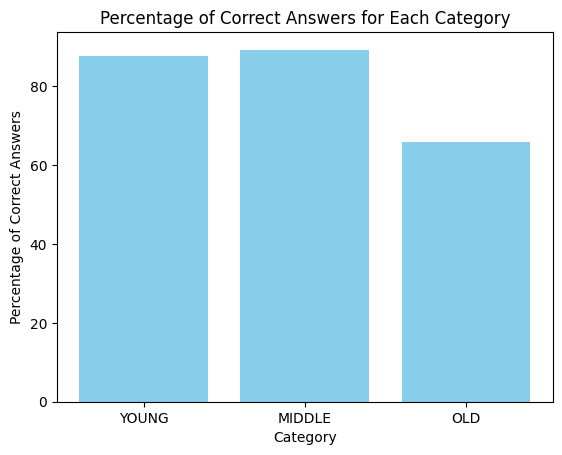

In [28]:

Results = y_labels
Answers = test_response

# Define categories
categories = ['YOUNG', 'MIDDLE', 'OLD']

# Initialize dictionaries to store counts of correct and total answers for each category
correct_counts = {category: 0 for category in categories}
total_counts = {category: 0 for category in categories}

# Iterate through results and answers to count correct and total answers for each category
for result, answer in zip(Results, Answers):
    category_result = categories[result]
    category_answer = categories[answer]

    total_counts[category_answer] += 1
    if result == answer:
        correct_counts[category_result] += 1

# Calculate the percentage of correct answers for each category
percentages = [(correct_counts[category] / total_counts[category]) * 100 for category in categories]

# Plotting the bar graph
plt.bar(categories, percentages, color='skyblue')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Percentage of Correct Answers')
plt.title('Percentage of Correct Answers for Each Category')

# Show the plot
plt.show()
